# Data Visualization
EDA: exploratory data analysis
1. Compute summary stats
1. Generate data visualizations

## Goals of Data Vis
1. Clearly and accurately represent data
1. Be creative, with the goal of increading readability
1. Label units, axes, and points of interests

## Some Jargon
Chart: 2D visualization
* Plot: a chart of data points (e.g. scatter plot)
* Graph: a chart of a mathematical function (e.g. sine curve)

## Ways to use Matplotlib
1. Use the pyplot module: like a state machine (e.g. there is always a "current figure")
1. Use the OOP interface: maintain object references
1. Mix of the two

# Matplotlib Chart Examples
## Line Chart Example

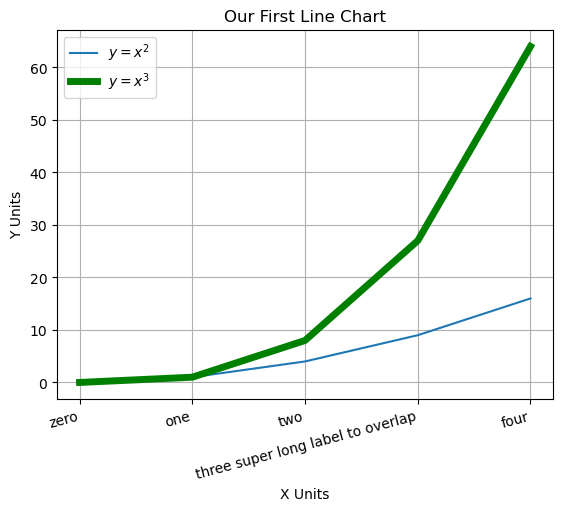

In [1]:
import matplotlib.pyplot as plt 

def line_chart_example(x, y, y3):
    plt.figure() # create a new "current figure"
    plt.plot(x, y, label="$y=x^2$")
    # plt.figure()
    plt.plot(x, y3, c="green", lw=5, label="$y=x^3$")
    # add some labels
    plt.legend()
    plt.title("Our First Line Chart")
    plt.xlabel("X Units")
    plt.ylabel("Y Units")
    plt.grid(True)
    # customize the x tick locations and labels
    xtick_labels = ["zero", "one", "two", "three super long label to overlap", "four"]
    plt.xticks(x, xtick_labels, rotation=15, ha="right")
    plt.show()

# we need some data
x = list(range(5))
y2 = [val ** 2 for val in x]
# task: add another to the figure for y = x^3
y3 = [val ** 3 for val in x]
line_chart_example(x, y2, y3)

## Scatter Charts
Plus saving a chart to a file (e.g. PDF, PNG, etc.)

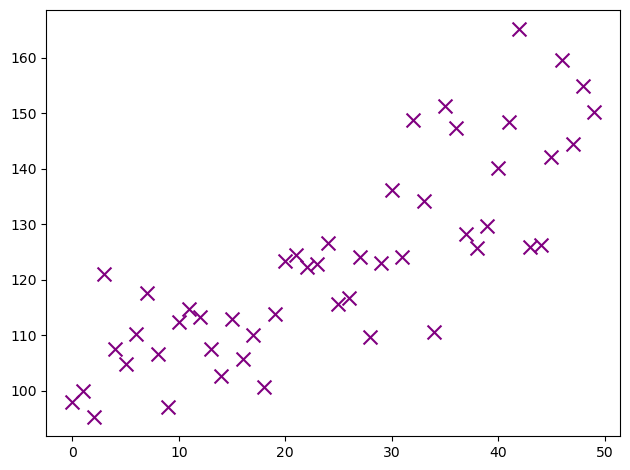

In [2]:
import numpy as np

def scatter_chart_example(x, y):
    plt.figure() # make a new current figure
    plt.scatter(x, y, marker="x", s=100, c="purple")

    # you can save a figure to a file
    plt.tight_layout() # nice function to call right before rendering
    plt.savefig("scatter_chart.pdf")
    plt.show()
    
# we need data    
x = list(range(50))
y = [np.random.normal(100, 10) + value for value in x]
scatter_chart_example(x, y)

## Bar Charts

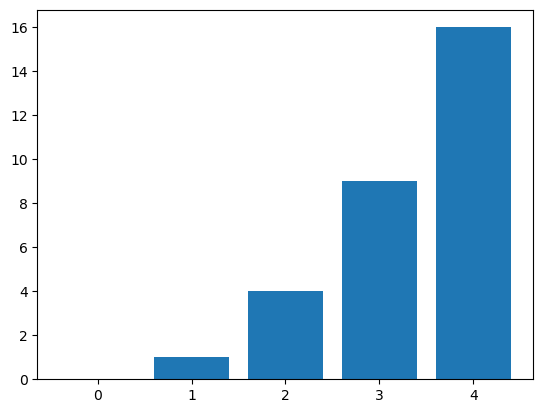

In [3]:
def bar_chart_example(x, y):
    plt.figure()
    plt.bar(x, y)
    plt.show()
    
# back to y=x^2
x = list(range(5))
y = [value ** 2 for value in x]
bar_chart_example(x, y)

## Pie Charts

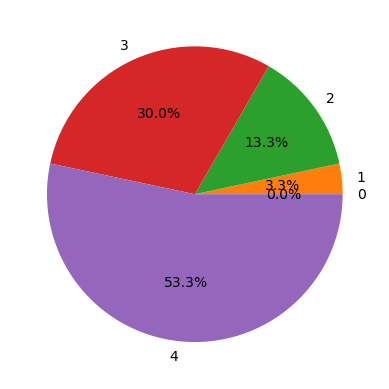

In [4]:
def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    
pie_chart_example(x, y)

## Histograms

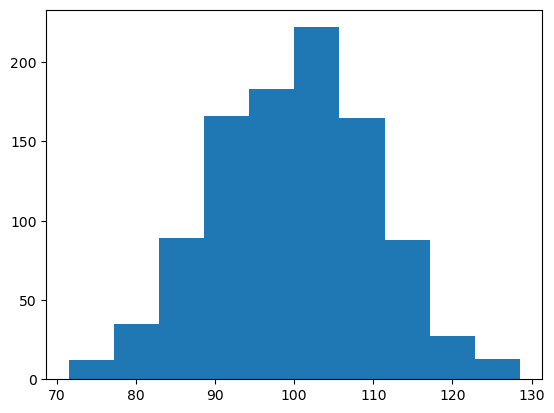

In [5]:
def histogram_example(data):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data, bins=10) # default is 10
    plt.show()
    
# let's generate some random "normal" data
import numpy as np 
mean = 100 # mu
stdev = 10 # sigma 
num_samples = 1000 
normal_data = np.random.normal(mean, stdev, num_samples)
histogram_example(normal_data)

## Box Plots

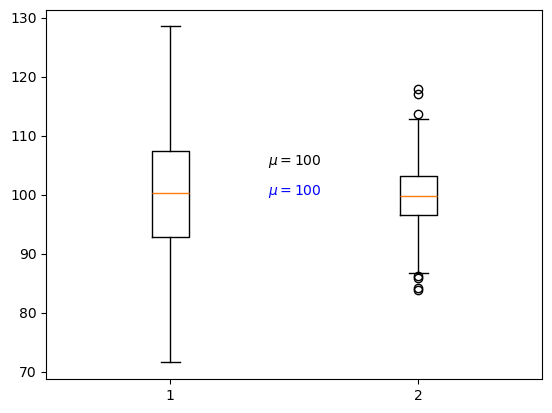

In [6]:
def box_plot_example(distributions): # distributions and labels are parallel
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions)
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate(r"$\mu=100$", xy=(1.5, 105), xycoords="data", horizontalalignment="center")
    plt.annotate(r"$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")

    plt.show()
    
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
box_plot_example([normal_data, normal_data2])

## Data Viz Warm-up Task(s)
1. In utils.py, write a function that returns the frequencies (occurrence counts) of values for a table's (continuous) attribute.
    * Example: The call `get_frequencies(msrp_table, msrp_header, "ModelYear")` for the `msrp_table` and `msrp_header` from DataPreparationFun should return the parallel arrays: `[75, 76, 77]` and `[2, 1, 1]`
    * Note: It would be good to add a few more rows to `msrp_table` for testing
    * Then, create a bar and a pie chart for the model year counts
1. Add another histogram with mean=100, stdev=5 to the same histogram figure
    1. New histogram narrower or wider than the original (blue)?
1. Add a parameter to `box_plot_example()` called `labels`
    1. `labels` is a 1D list of x-axis labels. Replace the 1 and 2 on the x axis `labels`
    1. Call `box_plot_example()` passing in descriptions for the 2 distributions

In [7]:
import utils
import importlib
importlib.reload(utils)

msrp_header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
            ["toyota corolla", 75, 2711],
            ["ford pinto", 76, 3025],
            ["toyota corolla", 77, 2789]]

AttributeError: module 'utils' has no attribute 'get_frequencies'

## Group By Warm-up Task(s)
Read the Group By section [here](https://github.com/GonzagaCPSC322/U3-Data-Analysis/blob/master/E%20Data%20Visualization.ipynb). Then in utils.py:

* Write a group by function that takes a table and an attribute index, partitions the rows of the table by the attribute, and then returns the resulting partitions (as a list of "tables")
* Test your function on ModelYear attribute
    * It would be good to add a few more rows to msrp_table for testing
* Visualize the data with model year on the x-axis, MSRP on the y-axis, and one box and whisker for each model year

## Discretization
Converting a numeric (continuous) attribute to be categorical (discrete). Lots of ways to do this:
* We will do equal widths binning
    * We will have N bins with N + 1 cutoffs that define the bins
    * Because `plt.hist()` and `np.histogram()` use N + 1 cutoffs
        * The first and the last cutoffs are the min and max respectively
        * Each bin is half open (e.g. `[ , )`) except the last bin is closed

In [ ]:
# we need data
np.random.seed(0)
values = np.random.choice(100, 20) # 20 ints in [0, 100) sampled with replacement
values = sorted(list(values))
print(values)
plt_freqs, plt_cutoffs, plt_artists = plt.hist(values, bins=5, edgecolor="black")
print("plt_cutoffs:", plt_cutoffs)
print("plt_freqs:", plt_freqs)

## Discretization Lab
1. Given a list of values and the number of equal-width bins to create (N), write a function to return a list of the N + 1 cutoff points.
1. Given a list of values and a list of N + 1 cutoff points, write a function to return the corresponding frequencies of the N bins.
1. Given a list of the N bins and the N frequencies of the bins, write a function to produce a histogram that matches that produced with the same data by plt.hist()